# Topic Fingerprinting

In [1]:
import pandas as pd

pd.set_option('display.max_colwidth', 800)

In [3]:
OPEN_DATA_URL = 'data/canada-open-data/inventory.csv'
COLUMNS = ['title_en', 'description_en','date_released']
catalog = pd.read_csv(OPEN_DATA_URL, usecols=COLUMNS)
catalog = catalog.dropna(subset=['description_en'])

In [4]:
catalog.head()

,title_en,description_en,date_released
0,The AAFC Productivity Account for Canadian Agriculture,"The AAFC Productivity Account for Canadian agriculture is an annual time-series database, covering the years 1961-2011, that is comprised of price index and constant dollar implicit quantity series for gross output and input aggregates. The data are defined at the national level only – i.e. for the whole of Canada. These data are used to estimate a total factor productivity (TFP) index for Canadian agriculture, which is the ratio of total gross output to total input, where both output and input are constant dollar implicit quantities. Average growth in the TFP index, referred to as TFP growth, can be estimated using a variety of methods; the growth rate reported in AAFC publications is estimated using OLS.\n\nFurther documentation provided in AAFC_PACA.odt",2018-08-10
1,Swift Current Water Chemistry - Long Term Tillage Study - 1962-2011,"The Swift current water quantity and quality is an annual time-series database covering the period of 1962-2011. This database contains datasets for annual runoff volume, peak flow rates, water quality attributes, snow water equivalent and soil moisture from an edge of field study conducted at Swift Current, SK.",2018-11-23
2,Minor Use Pesticides Program Project Status by Crop,"The Pest Management Centre’s (PMC) Minor Use Pesticides Program is a joint initiative between Agriculture and Agri-Food Canada and Health Canada’s Pest Management Regulatory Agency (PMRA) to improve the availability of reduced-risk products to agricultural producers and improve the access to a broad range of minor use pesticides. The PMC reviews the data resulting from field trials and laboratory analyses, and prepares a submission to PMRA to support the registration of the minor use pesticide. Upon receiving a finalized regulatory submission from PMC, PMRA reviews it and decides whether or not to accept the pesticide for use in Canada.\n\nThis is a complete list of PMC’s projects with their statuses. For those projects with the status D.3.2 Review Complete, please check with the pesti...",2018-12-14
3,Minor Use Pesticides Program Submission Status by Fiscal Year,"The Pest Management Centre Minor Use Pesticides Program is a joint initiative between Agriculture and Agri-Food Canada and Health Canada’s Pest Management Regulatory Agency (PMRA) to improve the availability of reduced-risk products to agricultural producers and improve the access to a broad range of minor use pesticides. The PMC reviews the data resulting from field trials and laboratory analyses, and prepares a submission to PMRA to support the registration of the minor use pesticide. Upon receiving a finalized regulatory submission from PMC, PMRA reviews it and decides whether or not to accept the pesticide for use in Canada.\n\nThis list of submissions to PMRA is the result of PMC’s work and is for information purposes only. To find out if the pesticide can be used, please check wi...",2018-12-14
4,Minor Use Pesticides Program Trial Statistics by Year by Discipline,The following table provides information pertaining to the minor use pesticide study and/or trial status. These studies/trials are managed by the Pest management Center of the AAFC. This table is updated monthly.,2018-12-14


In [5]:
catalog.iloc[0]

title_en                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  The AAFC Productivity Account for Canadian Agriculture
description_en    The AAFC Productivity Account for Canadian agriculture is an annual time-series database, covering the years 1961-2011, that is comprised of price index and constant dollar implicit quantity series

In [7]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.utils import simple_preprocess

def text_to_tokens(text):
    text = text.lower()
    text = remove_stopwords(text)
    tokens = simple_preprocess(text)
    return tokens

In [8]:
text_to_tokens('My name is Hardik, my email is hardikkamboj1@gmail.com and number is 7027556711')

['hardik', 'email', 'hardikkamboj', 'gmail', 'com', 'number']

In [9]:
dataset_descriptions = catalog.description_en.apply(text_to_tokens)

In [10]:
len(dataset_descriptions)

10814

In [12]:
print(dataset_descriptions[0])

['aafc', 'productivity', 'account', 'canadian', 'agriculture', 'annual', 'time', 'series', 'database', 'covering', 'years', 'comprised', 'price', 'index', 'constant', 'dollar', 'implicit', 'quantity', 'series', 'gross', 'output', 'input', 'aggregates', 'data', 'defined', 'national', 'level', 'canada', 'data', 'estimate', 'total', 'factor', 'productivity', 'tfp', 'index', 'canadian', 'agriculture', 'ratio', 'total', 'gross', 'output', 'total', 'input', 'output', 'input', 'constant', 'dollar', 'implicit', 'quantities', 'average', 'growth', 'tfp', 'index', 'referred', 'tfp', 'growth', 'estimated', 'variety', 'methods', 'growth', 'rate', 'reported', 'aafc', 'publications', 'estimated', 'ols', 'documentation', 'provided', 'aafc_paca', 'odt']


In [13]:
import gensim
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

dictionary = gensim.corpora.Dictionary(dataset_descriptions)
corpus = [dictionary.doc2bow(text) for text in dataset_descriptions]

# Dictionary

In [20]:
for i in range(0,20):
    print(i,dictionary[i])

0 aafc
1 aafc_paca
2 account
3 aggregates
4 agriculture
5 annual
6 average
7 canada
8 canadian
9 comprised
10 constant
11 covering
12 data
13 database
14 defined
15 documentation
16 dollar
17 estimate
18 estimated
19 factor


In [23]:
for i in range(0,2):
    print(i,' - ', corpus[i])

0  -  [(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 2), (21, 3), (22, 2), (23, 3), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 3), (43, 1), (44, 3), (45, 1), (46, 1)]
1  -  [(5, 2), (11, 1), (13, 2), (36, 1), (41, 1), (43, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 3)]


In [24]:
VECTOR_SIZE=50
lda_model:LdaModel = LdaModel(corpus, 
                              num_topics=VECTOR_SIZE, 
                              passes=4)
lda_model.num_topics

50

In [31]:
sample_doc = catalog.iloc[0][1]
clean_sample = text_to_tokens(sample_doc)
bow = dictionary.doc2bow(clean_sample)
sample_doc

'The AAFC Productivity Account for Canadian agriculture is an annual time-series database, covering the years 1961-2011, that is comprised of price index and constant dollar implicit quantity series for gross output and input aggregates. The data are defined at the national level only – i.e. for the whole of Canada. These data are used to estimate a total factor productivity (TFP) index for Canadian agriculture, which is the ratio of total gross output to total input, where both output and input are constant dollar implicit quantities. Average growth in the TFP index, referred to as TFP growth, can be estimated using a variety of methods; the growth rate reported in AAFC publications is estimated using OLS.\n\nFurther documentation provided in AAFC_PACA.odt'

In [30]:
print(clean_sample)

['aafc', 'productivity', 'account', 'canadian', 'agriculture', 'annual', 'time', 'series', 'database', 'covering', 'years', 'comprised', 'price', 'index', 'constant', 'dollar', 'implicit', 'quantity', 'series', 'gross', 'output', 'input', 'aggregates', 'data', 'defined', 'national', 'level', 'canada', 'data', 'estimate', 'total', 'factor', 'productivity', 'tfp', 'index', 'canadian', 'agriculture', 'ratio', 'total', 'gross', 'output', 'total', 'input', 'output', 'input', 'constant', 'dollar', 'implicit', 'quantities', 'average', 'growth', 'tfp', 'index', 'referred', 'tfp', 'growth', 'estimated', 'variety', 'methods', 'growth', 'rate', 'reported', 'aafc', 'publications', 'estimated', 'ols', 'documentation', 'provided', 'aafc_paca', 'odt']


In [33]:
print(bow)

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 2), (19, 1), (20, 2), (21, 3), (22, 2), (23, 3), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 3), (43, 1), (44, 3), (45, 1), (46, 1)]


In [35]:
lda_model[bow]
# tuples of (topic,relevance)

[(0, 0.054900076),
 (1, 0.020726454),
 (5, 0.029385524),
 (8, 0.060372952),
 (10, 0.045898512),
 (15, 0.051209603),
 (18, 0.1695459),
 (19, 0.016950175),
 (20, 0.055183854),
 (22, 0.03369604),
 (37, 0.07543345),
 (44, 0.31176412),
 (47, 0.06420404)]

In [36]:
pd.DataFrame(lda_model[bow], 
             columns=['Topic','Relevance']).set_index('Topic')

,Relevance
Topic,
0,0.054900
1,0.020726
5,0.029385
8,0.060373
10,0.045899
15,0.051209
18,0.169547
19,0.016950
20,0.055181


In [37]:
def topic_vector(topic_model:LdaModel, text:str):
    processed_text = text_to_tokens(text) # clearning text
    bag_of_words = dictionary.doc2bow(processed_text) # from text to bow
    fingerprint = [0] * topic_model.num_topics # create a list of zeros of len = num of topics
    for topic, prob in topic_model[bag_of_words]:
        fingerprint[topic] = prob # add the vaule of topic to the required one
    return fingerprint # vector representation of the text, size of vector = len of topics

In [38]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from IPython.display import display

style.use('fivethirtyeight')

VECTOR_SIZE=50
%matplotlib inline

def show_fingerprint(topic_model, text:str):
    display(text)
    vector = topic_vector(topic_model, text)
    plt.figure(figsize=(14,2))
    ax = plt.bar( range(len(vector)), 
                 vector, 
                 0.25, 
                 linewidth=1)
    plt.ylim(top=0.4)
    plt.tick_params(axis='both', 
                    which='both',
                    left=False, 
                    bottom=False, 
                    top=False,
                    labelleft=False, 
                    labelbottom=False)
    plt.grid(False)

'The AAFC Productivity Account for Canadian agriculture is an annual time-series database, covering the years 1961-2011, that is comprised of price index and constant dollar implicit quantity series for gross output and input aggregates. The data are defined at the national level only – i.e. for the whole of Canada. These data are used to estimate a total factor productivity (TFP) index for Canadian agriculture, which is the ratio of total gross output to total input, where both output and input are constant dollar implicit quantities. Average growth in the TFP index, referred to as TFP growth, can be estimated using a variety of methods; the growth rate reported in AAFC publications is estimated using OLS.\n\nFurther documentation provided in AAFC_PACA.odt'

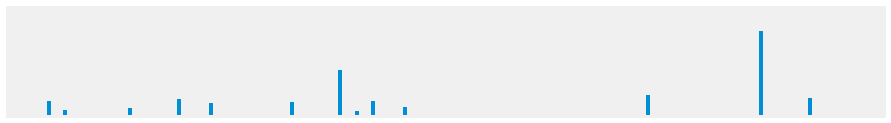

In [41]:
show_fingerprint(lda_model,catalog.description_en[0])

"The Pest Management Centre Minor Use Pesticides Program is a joint initiative between Agriculture and Agri-Food Canada and Health Canada’s Pest Management Regulatory Agency (PMRA) to improve the availability of reduced-risk products to agricultural producers and improve the access to a broad range of minor use pesticides. The PMC reviews the data resulting from field trials and laboratory analyses, and prepares a submission to PMRA to support the registration of the minor use pesticide. Upon receiving a finalized regulatory submission from PMC, PMRA reviews it and decides whether or not to accept the pesticide for use in Canada.\n\nThis list of submissions to PMRA is the result of PMC’s work and is for information purposes only. To find out if the pesticide can be used, please check with the pesticide manufacturer or visit PMRA's pesticide label database. "

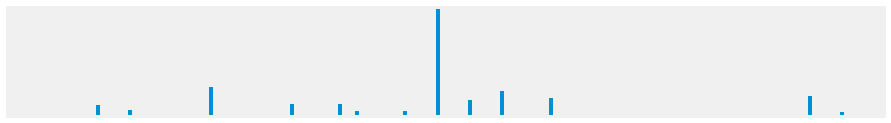

In [42]:
show_fingerprint(lda_model, catalog.description_en[3])

'The Agriculture and Agri-Food Canada’s (AAFC) Watersheds Project level series supplies a number of watershed and watershed related datasets for the Prairie Provinces.  The levels are greater or smaller assemblages of hydrometric areas, or the components defining them. \nThe Project is organized by hydrometric gauging stations which are sourced from Environment Canada, the United States, and Canadian provinces. Additional stations were generated to address structural issues, like river confluences or lake inlets. Collectively, they are referred to as the gauging stations, or simply, the stations.\nThe drainage area that each station monitors, between itself and one or more of its upstream neighbours, is called an ‘incremental gross drainage area’. \nThe incremental gross drainage areas are collected into larger or smaller groupings based on size or defined interest to generate the various ‘levels ’of the series. They include:\nBasins of varying size:\n1.\tMajor drainage systems (3): Ar

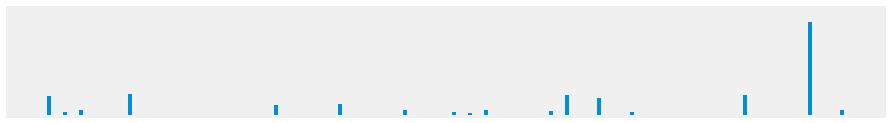

In [43]:
show_fingerprint(lda_model, catalog.description_en[10])

In [45]:
print(topic_vector(lda_model, catalog.description_en[10]))

[0.07345764, 0.013393863, 0.020089902, 0, 0, 0.08117507, 0, 0, 0, 0, 0, 0, 0, 0, 0.03990278, 0, 0, 0, 0.04372164, 0, 0, 0, 0.019747056, 0, 0, 0.013427172, 0.010339144, 0.020143604, 0, 0, 0, 0.017509451, 0.075373, 0, 0.06605501, 0, 0.013970689, 0, 0, 0, 0, 0, 0, 0.07825997, 0, 0, 0, 0.34532997, 0, 0.022783713]
